# **Sales Performance Analysis for Amazon**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Reading Amazon Sales Report csv File**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Science Project/Amazon Sale Report.csv')
print(df)

         index             Order ID      Date                        Status  \
0            0  405-8078784-5731545  04-30-22                     Cancelled   
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
3            3  403-9615377-8133951  04-30-22                     Cancelled   
4            4  407-1069790-7240320  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128971  128970  406-6001380-7673107  05-31-22                       Shipped   
128972  128971  402-9551604-7544318  05-31-22                       Shipped   
128973  128972  407-9547469-3152358  05-31-22                       Shipped   
128974  128973  402-6184140-0545956  05-31-22                       Shipped   
128975  128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel ship-service-level 

## **Data Cleaning**

In [ ]:
df.drop(["New", "PendingS"], axis=1, inplace=True)      #removing blank columns
df.dropna(inplace=True)                                 #removing blank rows
change_type={
    "Date": 'datetime64[ns]',
    "ship-postal-code": int
}
df= df.astype(change_type)                              #changing datatype of specific columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   Courier Status      37514 non-null  object        
 10  Qty                 37514 non-null  int64         
 11  currency            37514 non-null  object        
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object        

<ipython-input-4-e80afa5c462c>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df= df.astype(change_type)                              #changing datatype of specific columns


## **Exploratory Data Analysis**

### **Size Analysis**

Total quantities sold by size, sorted from most to least
        Qty
Size      
M     5905
L     5795
XL    5481
XXL   4465
3XL   3972
S     3896
XS    2191
Free   467
6XL    170
5XL    104
4XL     93


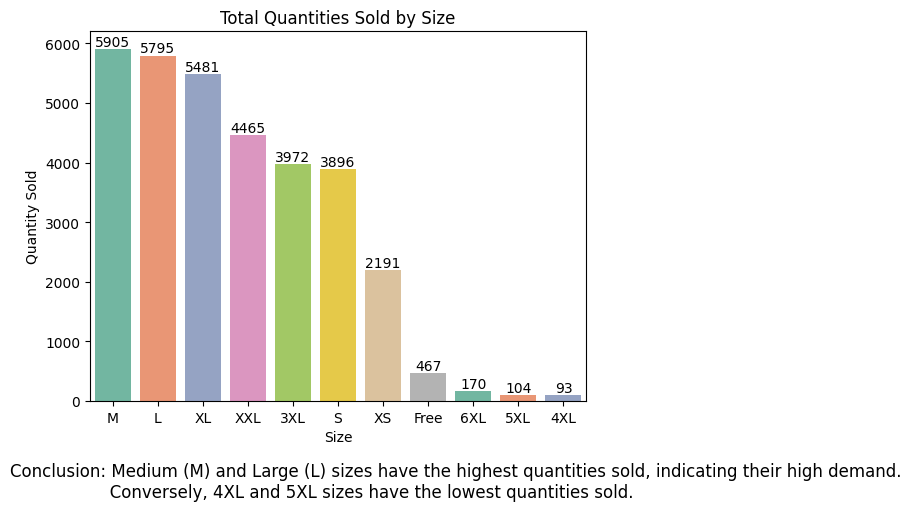

In [ ]:
#--------------------------Size Analysis-----------------------------
size_data=df.groupby(["Size"])["Qty"].sum().sort_values(ascending=False)
size_data=pd.DataFrame(size_data)
print("Total quantities sold by size, sorted from most to least\n",size_data)

#Plotting the analysed size data
size_analysis=sns.barplot(x="Size", y="Qty", data=size_data, palette="Set2", hue="Size")
plt.title("Total Quantities Sold by Size")
plt.xlabel("Size")
plt.ylabel("Quantity Sold")
plt.figtext(0,-0.09,"Conclusion: Medium (M) and Large (L) sizes have the highest quantities sold, indicating their high demand.\n                   Conversely, 4XL and 5XL sizes have the lowest quantities sold.", fontsize=12)
for bars in size_analysis.containers:
  size_analysis.bar_label(bars)

### **Category Analysis**

Total Revenue by Category
             Qty       Amount
Category                    
T-shirt   45292  39206756.65
Shirt     45044  21297770.08
Blazzer   13943  11215104.12
Trousers   9898   5346286.30
Perfume    1051    789419.66
Wallet      863    458408.18
Socks       399    150757.50
Shoes       153    124752.76
Watch         3       915.00


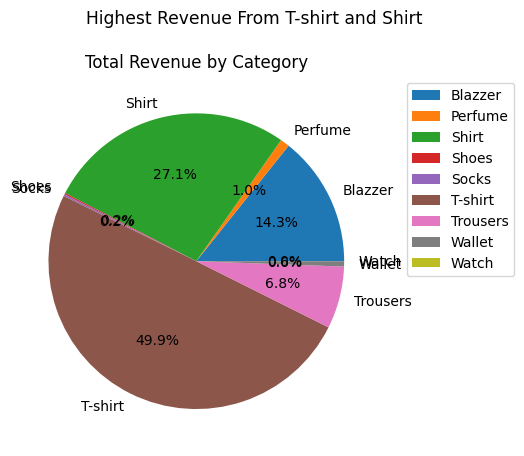

In [ ]:
#----------------------------------Category Analysis------------------------------------

prod_revenue= df.groupby("Category")[["Qty", "Amount"]].sum()
print("Total Revenue by Category\n",prod_revenue.sort_values(by="Qty", ascending=False))
plt.pie(prod_revenue["Amount"],labels=prod_revenue.index, autopct="%1.1f%%")
plt.title("Total Revenue by Category")
plt.legend(prod_revenue.index, bbox_to_anchor=(1.05, 1))
plt.figtext(0.34,0.99,"Highest Revenue From T-shirt and Shirt", fontsize=12.3)
plt.show()

### **Geographical Analysis**

<ipython-input-120-2a52f6d955bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df["ship-state"].isin(top_states.index)], x="ship-state", palette="Set2")


Top 10 States with Highest Number of Shipped Orders
 ship-state
MAHARASHTRA       22272
KARNATAKA         17324
TAMIL NADU        11488
TELANGANA         11330
UTTAR PRADESH     10646
DELHI              6778
KERALA             6577
WEST BENGAL        5962
ANDHRA PRADESH     5427
Gujarat            4482
Name: count, dtype: int64


Text(0, -0.3, 'Conclusion: Maharashtra has the highest quantities shipped, indicating high demand.\n')

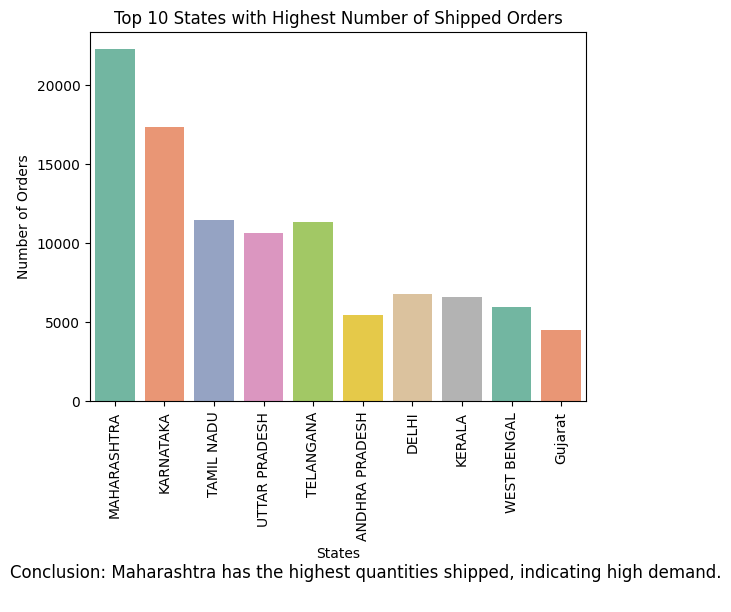

In [ ]:
#-------------------------------------Geographical Analysis-------------------------------------

top_states=df["ship-state"].value_counts().head(10)
sns.countplot(data=df[df["ship-state"].isin(top_states.index)], x="ship-state", palette="Set2")
print("Top 10 States with Highest Number of Shipped Orders\n",top_states)
plt.title("Top 10 States with Highest Number of Shipped Orders")
plt.xlabel("States")
plt.ylabel("Number of Orders")
plt.xticks(rotation=90)
plt.figtext(0,-0.3,"Conclusion: Maharashtra has the highest quantities shipped, indicating high demand.\n", fontsize=12)

### **Sales Channel Analysis**

Sales Channel
Amazon.in     128852
Non-Amazon       124
Name: count, dtype: int64


Text(0.1, 0.07, "Conclusion: Amazon.in dominates with 128,852 sales, \n                   vastly surpassing Non-Amazon's 124 sales.")

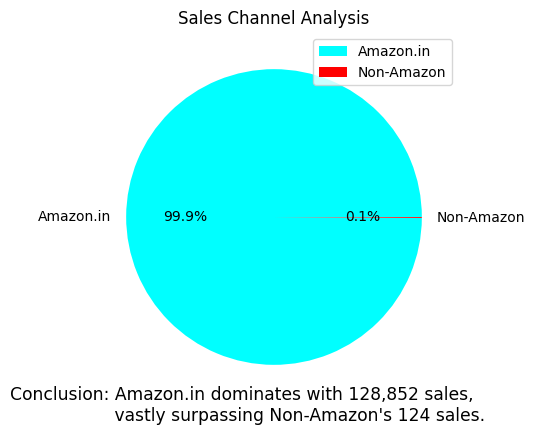

In [ ]:
#-----------------------------------------Sales Channel Analysis------------------------------------------
# df.columns

sales_channel=df["Sales Channel"].value_counts()
print(sales_channel)
plt.pie(sales_channel, labels=sales_channel.index, autopct="%1.1f%%", colors=["cyan", "red"])
plt.title("Sales Channel Analysis")
plt.legend(sales_channel.index)
plt.figtext(0.1, 0.07,"Conclusion: Amazon.in dominates with 128,852 sales, \n                   vastly surpassing Non-Amazon's 124 sales.", fontsize=12.3)

# **Conclusion**

The analysis of our sales data reveals several key insights that can guide strategic decision-making:

### Size Analysis:
*   Medium (M) and Large (L) sizes have the highest quantities sold, indicating a strong preference and high demand for these sizes among the customers. This suggests that maintaining ample stock for these sizes is crucial to meet customer demand and maximize sales.

### Category Analysis:
*   The highest revenue is generated from T-shirts and Shirts, highlighting these categories as top performers on Amazon. Focusing on expanding these product lines and enhancing their marketing could further boost sales and revenue.

### Geographical Analysis:
*   Maharashtra has the highest quantities shipped, indicating a significant demand in this region. Targeted marketing campaigns and optimized logistics in Maharashtra could further enhance sales and customer satisfaction.

### Sales Channel Analysis:
*   Amazon.in overwhelmingly dominates the sales channels, with 128,852 sales compared to Non-Amazon's 124 sales. This underscores the importance of Amazon.in as the primary sales platform. Efforts to optimize the customer experience on Amazon.in and leverage its extensive reach can drive further growth.

By focusing on these high-demand sizes, top-performing categories, key geographical regions, and the dominant sales channel, we can strategically enhance our sales performance and customer satisfaction. These insights provide a clear roadmap for future efforts to sustain and accelerate the company's growth.